In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Resources/whatoplay_data.csv")
data = pd.read_csv("../Resources/MLdata.csv")
data2 = pd.read_csv("../Resources/grouped_years_platforms_names.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1195 non-null   object 
 1   Platform         1195 non-null   object 
 2   Year_of_Release  1195 non-null   int64  
 3   Genre            1195 non-null   object 
 4   Publisher        1195 non-null   object 
 5   NA_Sales         1195 non-null   float64
 6   EU_Sales         1195 non-null   float64
 7   JP_Sales         1195 non-null   float64
 8   Other_Sales      1195 non-null   float64
 9   Global_Sales     1195 non-null   float64
 10  Critic_Score     1195 non-null   int64  
 11  Critic_Count     1195 non-null   int64  
 12  User_Score       1195 non-null   float64
 13  User_Count       1195 non-null   int64  
 14  Developer        1195 non-null   object 
 15  Rating           1195 non-null   object 
 16  PlayScore        1195 non-null   float64
 17  GameScore     

In [4]:
data['Platform'].unique()

array([2, 0, 3, 1], dtype=int64)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

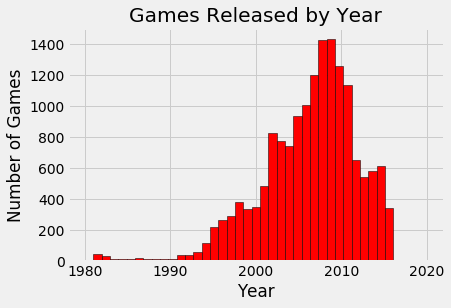

In [6]:
years = data2["Year"].max() - data2["Year"].min() + 1
plt.hist(data2["Year"], bins=years, color="red", edgecolor="black")
plt.title("Games Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Games");

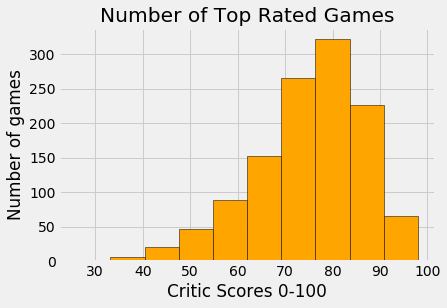

In [7]:
plt.hist(df["Critic_Score"], bins=10, color="orange", edgecolor="black")
plt.title("Number of Top Rated Games")
plt.xlabel("Critic Scores 0-100")
plt.ylabel("Number of games");

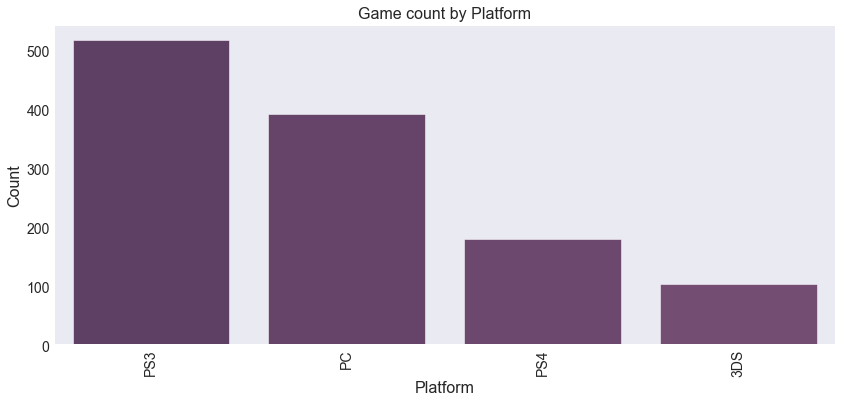

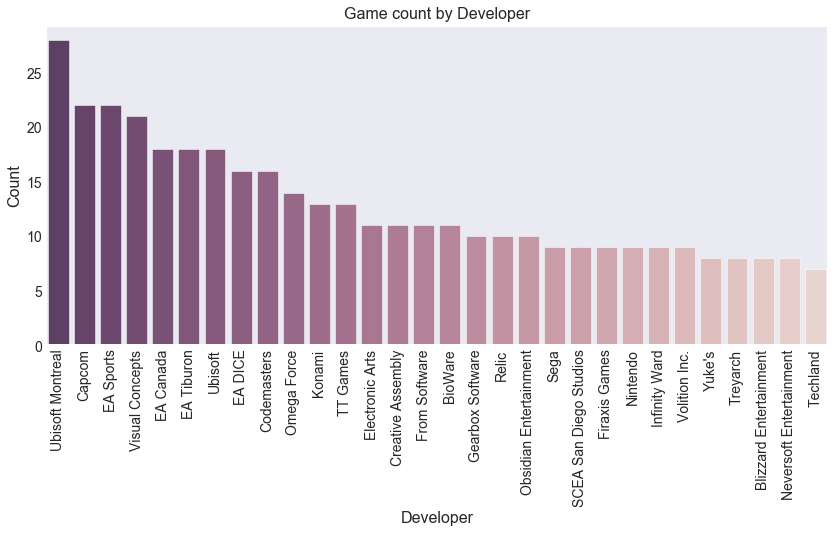

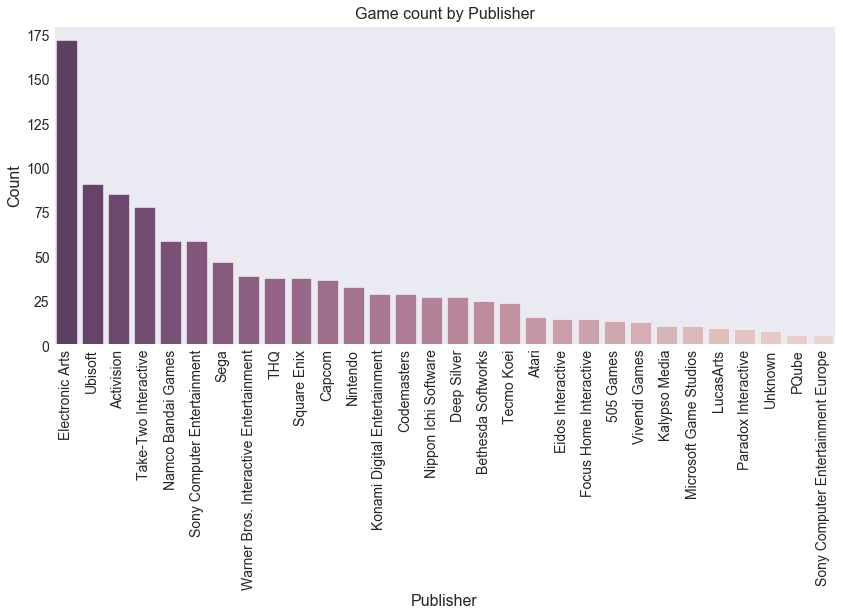

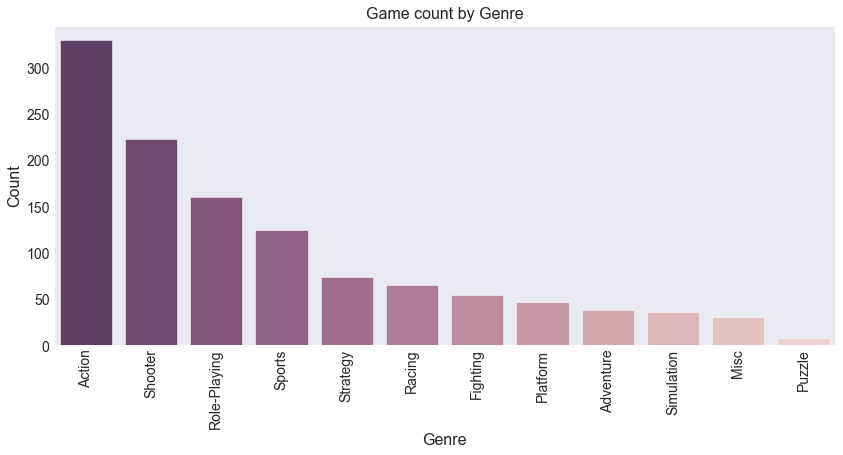

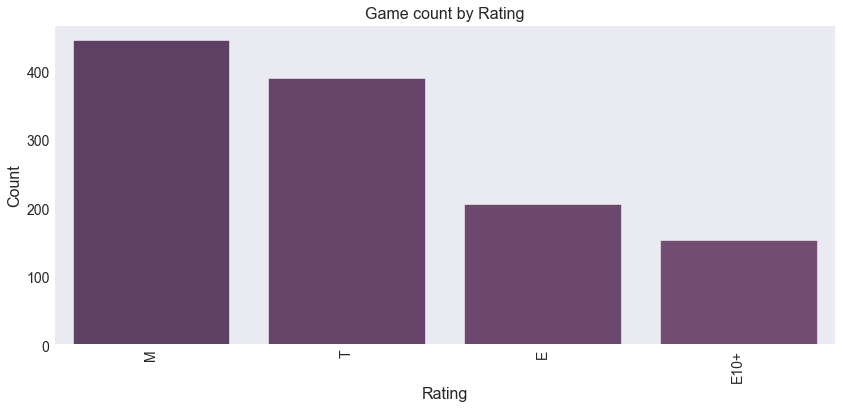

In [8]:
cols = ['Platform', 'Developer', 'Publisher', 'Genre', 'Rating']

for col in cols:
    chart = df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("dark")
    plt.figure(figsize=(12.5, 5.5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xlabel(col, fontsize=16)

In [9]:
features = data[["Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "User_Count", "Critic_Count", "TopSellers"]]

#X = data.drop(['TopSellers'], axis=1)
X = features.drop(['TopSellers'], axis=1)
y = data['GlobalSellers'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(1195, 7)
(1195, 1)


In [10]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# defining an error function
def mae(real, prediction):
    return np.average(abs(real - prediction))

In [17]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [13]:
def machineLearn(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)

    # Return the performance metric
    return model_mae

In [14]:
def prediction(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)

    # Return the performance metric
    return model_pred

In [15]:
LR = LinearRegression()
LRmae = machineLearn(LR)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(LRmae))

Linear Regression Performance on the test set: MAE = 0.3652


In [16]:
SVM = SVR(C = 1000, gamma=0.1)
SVMmae = machineLearn(SVM)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(SVMmae))

Support Vector Machine Regression Performance on the test set: MAE = 0.4010


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
RandomForest = RandomForestRegressor(random_state=60)
RandomForestmae = machineLearn(RandomForest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(RandomForestmae))

C:\Users\gatli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Regression Performance on the test set: MAE = 0.3808


In [19]:
GradientBoosting = GradientBoostingRegressor(random_state=60)
GradientBoostingmae = machineLearn(GradientBoosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(GradientBoostingmae))

Gradient Boosting Regression Performance on the test set: MAE = 0.3783


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
KNN = KNeighborsRegressor(n_neighbors=10)
KNNmae = machineLearn(KNN)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(KNNmae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.3468


In [22]:
ridge = Ridge(alpha=10)
ridge_mae = machineLearn(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.3629


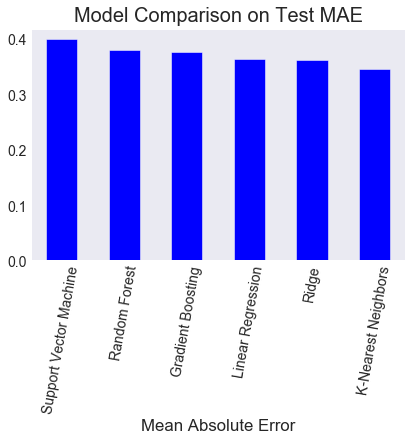

In [23]:
machineModels = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Ridge"],
                                 "mae": [LRmae, SVMmae, RandomForestmae, 
                                         GradientBoostingmae, KNNmae, ridge_mae]})
machineModels.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="bar",
                                                           color="blue", legend=False)
plt.xticks(rotation=80)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

In [24]:
data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                            data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])


In [25]:
features = data[["Weighted_Score", "Critic_Score", "User_Score", "PlayScore", "GameScore", "CriticScore", "User_Count", "Critic_Count", "TopSellers"]]
X = features.drop(['TopSellers'], axis=1)
y = features['TopSellers'].values.reshape(-1, 1)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
LR = LinearRegression()
LRmae = machineLearn(LR)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(LRmae))

Linear Regression Performance on the test set: MAE = 0.3095


In [28]:
SVM = SVR(C = 1000, gamma=0.1)
SVMmae = machineLearn(SVM)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(SVMmae))

Support Vector Machine Regression Performance on the test set: MAE = 0.3985


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
RandomForest = RandomForestRegressor(random_state=60)
RandomForestmae = machineLearn(RandomForest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(RandomForestmae))

C:\Users\gatli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Regression Performance on the test set: MAE = 0.3773


In [30]:
GradientBoosting = GradientBoostingRegressor(random_state=60)
GradientBoostingmae = machineLearn(GradientBoosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(GradientBoostingmae))

Gradient Boosting Regression Performance on the test set: MAE = 0.3743


C:\Users\gatli\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
KNN = KNeighborsRegressor(n_neighbors=10)
KNNmae = machineLearn(KNN)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(KNNmae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.3027


In [32]:
ridge = Ridge(alpha=10)
ridge_mae = machineLearn(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.3095


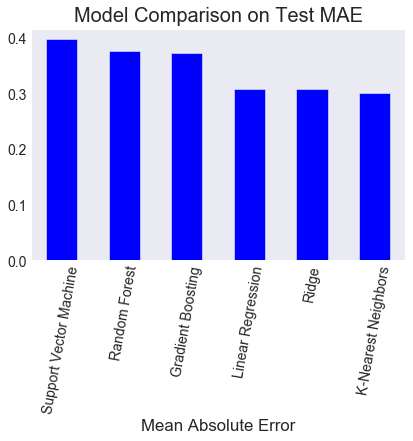

In [33]:
machineModels = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Ridge"],
                                 "mae": [LRmae, SVMmae, RandomForestmae, 
                                         GradientBoostingmae, KNNmae, ridge_mae]})
machineModels.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="bar",
                                                           color="blue", legend=False)
plt.xticks(rotation=80)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

In [34]:
# I want to do a graph here comparing the two charts mae